In [ ]:
# Author: Vanshika Gupta
# Jointly with: Prof Chrysafis Vogiatzis 

#### Getting the centrality metrics for a graph.

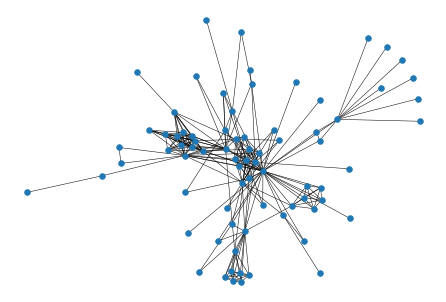

In [107]:
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

G = nx.les_miserables_graph()
pos = nx.spring_layout(G)
nx.draw(G, node_size=30, width=0.5)
k = 3

In [98]:
# Find subset of nodes with maximum degree:

G_degree = nx.degree_centrality(G)
max_degree = 0
max_S = []
for c in combinations(G.nodes(), k):
    G1 = G.subgraph(c)
    G1_degree = nx.degree_centrality(G1)
    
    sumG = 0
    sumG1 = 0
    for j in G1_degree:
        sumG = sumG + G_degree[j]
        sumG1 = sumG1 + G1_degree[j]
    
    diff = sumG*(G.number_of_nodes()-1) - sumG1*(G1.number_of_nodes()-1)
    C_degree = diff/(G.number_of_nodes()-1)
    if(max_degree < C_degree):
        max_degree = C_degree
        max_S = c
    
print(max_degree, max_S)

0.9342105263157895 ('Valjean', 'Gavroche', 'Marius')


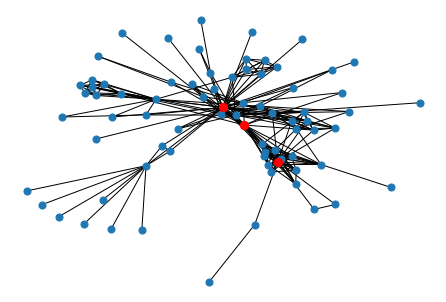

In [99]:
# colors = [bet[i] for i in G.nodes()]

nx.draw(G, pos, node_size=50)
nx.draw_networkx_nodes(G, pos, nodelist=max_S, node_color='r', 
                            node_size=70)

In [108]:
# Find subset of nodes with maximum betweenness:

max_btw = 0
max_S = []
for c in combinations(G.nodes(), k):
    
    a = [i for i in G.nodes()]
    for i in c:
        a.remove(i)
        
    btw = nx.betweenness_centrality_subset(G,a,a)
    
    sum_G=0
    for j in c:
        sumG = sumG + btw[j]
        
    if(max_btw < sumG):
        max_btw = sumG
        max_S = c
    
print(max_btw, max_S)

16335879.813150637 ('Child2', 'Brujon', 'MmeHucheloup')


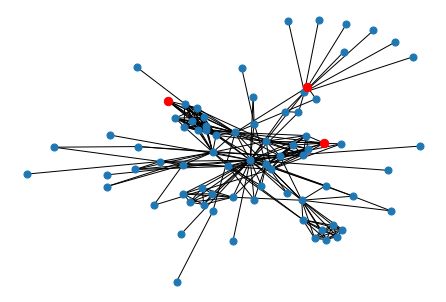

In [109]:
# colors = [bet[i] for i in G.nodes()]

nx.draw(G, pos, node_size=50)
nx.draw_networkx_nodes(G, pos, nodelist=max_S, node_color='r', 
                            node_size=70)

In [105]:
# Find subset of nodes with maximum betweenness:

max_close = 0
max_S = []
for c in combinations(G.nodes(), k):
    
    a = [i for i in G.nodes()]
    for i in c:
        a.remove(i)

    sumClo = 0
    dij=0
    for i in c:
        for j in a:
            dij = dij + nx.shortest_path_length(G, source=i, target=j)
        sumClo = sumClo + (G.number_of_nodes()-k)/dij
    if(max_close < sumClo):
        max_close = sumClo
        max_S = c
    
print(max_close, max_S)

1.1075464190981432 ('Valjean', 'Javert', 'Marius')


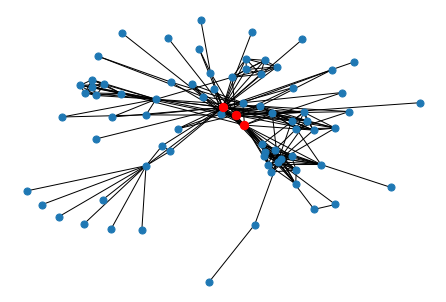

In [106]:
# colors = [bet[i] for i in G.nodes()]

nx.draw(G, pos, node_size=50)
nx.draw_networkx_nodes(G, pos, nodelist=max_S, node_color='r', 
                            node_size=70)